# Problem Statement:

We are doing sentiment analysis of a real data by LSTM model and Naive bayes model(Gaussian + Multinomial). After that we see the results of the model which work well for sentiment analysis. Finally we train Naive Bayes on a voice recogination data(male+female) and compare the results of Naive bayes that on which type of data that models work well. 

**Group Member : Anant Kumar (2019uce0059)
               Chandan Kumar (2019ucs0094)**

In [1]:
import pandas as pd
import numpy as np
import re
import collections

In [2]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


# Data Preprocessing

In [3]:
df = df.reindex(np.random.permutation(df.index))  
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
5781,@SouthwestAir I have never been mor e disappoi...,negative
13151,@AmericanAir thanks.....,positive
6501,@SouthwestAir can you make a premium wifi that...,negative
13181,@AmericanAir 2 months and still no exec platin...,negative
8356,"@JetBlue Awesome, thanks! I'll give a call Lat...",positive


In [4]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91983\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

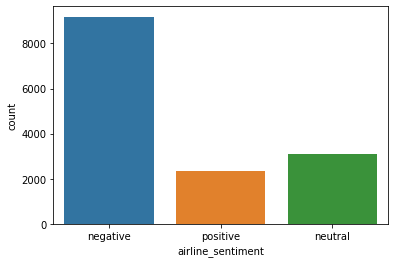

In [6]:
sns.countplot(x='airline_sentiment', data=df)

In [7]:
NB_WORDS = 10000 # Parameter indicating the number of words we'll put in the dictionary 
VAL_SIZE = 1000 # Size of the validation set 
EPOCHS = 20 # Number of epochs we usually start to train with 
BATCH_SIZE = 512 # Size of the batches used in the mini-batch gradient descent

In [8]:
def remove_stopwords(input_text):
        stopwords_list = stopwords.words('english')
        # Some words which might indicate a certain sentiment are kept via a whitelist
        whitelist = ["n't", "not", "no","yes"]
        words = input_text.split() 
        clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
        return " ".join(clean_words) 
    
def remove_mentions(input_text):
        return re.sub(r'@\w+', '', input_text)
       
df.text = df.text.apply(remove_stopwords).apply(remove_mentions)
df.head()

,text,airline_sentiment
5781,"never mor disappointed company, charging $8 u...",negative
13151,thanks.....,positive
6501,make premium wifi pay $30 decent? #slow-fi,negative
13181,months still no exec platinum member cards. W...,negative
8356,"Awesome, thanks! I'll give call Late Flightr ...",positive


In [9]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.2, random_state=37)
print('Training Data:', X_train.shape[0])
print('Test Data:', X_test.shape[0])

Training Data: 11712
Test Data: 2928


In [11]:
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Top 5 most common words are: [('flight', 3081), ('not', 1277), ('no', 1199), ('get', 1043), ('t', 993)]


In [12]:
word_index = tk.word_index
print('Found %s unique tokens.' % len(word_index))

Found 13183 unique tokens.


In [13]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [14]:
X_train_seq 

[[3192, 1297, 297, 221, 666],
 [26,
  1119,
  1068,
  38,
  26,
  188,
  23,
  5669,
  47,
  223,
  396,
  75,
  327,
  345,
  2733,
  4040,
  2733],
 [242, 48, 164, 333, 66, 1, 617, 756, 652, 59, 202, 1782, 23],
 [2129, 4041, 1452, 97, 1932, 866, 194, 92],
 [756, 74, 1933, 618, 557, 77, 904, 4, 256, 334, 16, 87, 3193, 5670, 558],
 [53, 102, 1, 27, 430, 18, 42, 535, 57, 49, 18, 867, 5671],
 [233, 20, 1298, 203, 36, 12, 1069, 5672, 5673],
 [253, 243, 88, 1070, 196, 2379, 24, 619, 135, 146, 1],
 [1025, 16, 1243],
 [5674, 328, 417, 868, 2734, 172],
 [22, 478, 127, 597, 89, 214, 180],
 [74, 70, 1453, 206, 381, 70, 175, 1934, 270, 36],
 [1454, 346, 14, 10, 838, 1026, 1783, 2735, 5675, 1, 3194, 1027, 584, 1028],
 [431, 38, 103, 82, 14, 335, 314, 5676, 56, 43, 5677],
 [1935, 5678, 5679, 4042, 1071, 66, 60, 1368, 39, 1368, 262, 7, 5, 6, 5680],
 [58, 187, 231, 194, 139, 67, 151, 125, 298, 925, 195, 11],
 [22,
  11,
  348,
  207,
  598,
  130,
  134,
  113,
  117,
  15,
  459,
  229,
  1936,
  2

In [15]:
X_test_seq

[[26, 214, 31, 1039, 89],
 [140, 471, 18, 20, 104, 4, 114, 4, 85, 896],
 [8, 73, 153, 31, 699, 231],
 [11, 205, 251, 387, 4, 8, 987, 1995, 744],
 [1, 6327, 774, 126, 2789, 422, 1290, 178],
 [1229, 10],
 [8, 2, 847, 261, 1, 27, 18, 1349],
 [3811, 101, 103, 80, 140, 119, 406, 4163],
 [3, 273, 455, 1058, 49, 8],
 [1634, 810, 147, 102, 1376, 120, 509, 291, 56, 101],
 [228, 87, 1, 1192, 6195, 10, 1, 504, 1603, 818],
 [22, 11],
 [113, 267, 36, 155, 38, 220, 2484, 17, 31, 415, 17, 316, 7218, 17, 1556, 800],
 [2655, 32, 60, 2085, 138, 28, 1920, 42],
 [427, 206, 431, 38, 37, 901, 8, 1079],
 [8, 214, 223, 253, 36],
 [2, 25, 546, 662, 1077, 45, 7972, 3976, 1, 1342, 376],
 [1087, 2329, 263, 1034, 24, 45, 28, 57, 934, 12],
 [90, 320, 279, 10],
 [149, 100],
 [3432, 83, 111, 1312, 63],
 [29, 1203, 671, 207, 745, 1352, 2, 942, 7, 5, 6],
 [11, 412, 771, 424, 213, 53, 60, 22, 124, 296, 44],
 [1, 294, 289, 532, 68, 9, 33, 3, 1095, 57, 153, 126, 35, 205, 227, 82, 44],
 [168, 20, 131, 388, 2, 20, 26, 57, 1

In [16]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    11712.000000
mean        11.149505
std          4.226339
min          1.000000
25%          8.000000
50%         12.000000
75%         14.000000
max         24.000000
Name: text, dtype: float64

In [17]:
from keras.preprocessing.sequence import pad_sequences

In [18]:
def Findmaxlen(data):
    l=0
    for i in data:
        l=max(l,len(i))
    return l;

In [19]:
MAX_LEN = max(Findmaxlen(X_train_seq),Findmaxlen(X_train_seq))
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)
MAX_LEN

26

In [20]:
X_train_seq_trunc

array([[   0,    0,    0, ...,  297,  221,  666],
       [   0,    0,    0, ..., 2733, 4040, 2733],
       [   0,    0,    0, ...,  202, 1782,   23],
       ...,
       [   0,    0,    0, ...,  276,  160, 1554],
       [   0,    0,    0, ...,  150,  349,  172],
       [   0,    0,    0, ...,  639, 1405, 1004]])

In [21]:
X_test_seq_trunc

array([[   0,    0,    0, ...,   31, 1039,   89],
       [   0,    0,    0, ...,    4,   85,  896],
       [   0,    0,    0, ...,   31,  699,  231],
       ...,
       [   0,    0,    0, ..., 1047,  587,   52],
       [   0,    0,    0, ...,   32,   31,   12],
       [   0,    0,    0, ...,  206,  433,    1]])

In [22]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [23]:
y_train_le

array([1, 1, 1, ..., 2, 0, 2])

In [24]:
y_test_le

array([1, 0, 2, ..., 0, 0, 0])

In [25]:
y_train_oh

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [26]:
y_test_oh

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Training On LSTM model

The network starts with an embedding layer. The layer lets the system expand each token to a more massive vector, allowing the network to represent a word in a meaningful way. Then will apply an LSTM layer with 64 units. We will also apply dropout to reduce overfitting. The final layer will be a Dense layer with 3 outputs as we have 3 labels in our dataset with softmax activation

In [27]:
from keras import models
from keras import layers

In [28]:
model = models.Sequential()
model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
model.add(layers.LSTM(64))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(X_train_seq_trunc, y_train_oh, epochs=20, batch_size=BATCH_SIZE, validation_data=(X_test_seq_trunc, y_test_oh))

Epoch 1/20
23/23 [==============================] - 6s 121ms/step - loss: 1.0028 - accuracy: 0.6153 - val_loss: 0.9186 - val_accuracy: 0.6281
Epoch 2/20
23/23 [==============================] - 3s 122ms/step - loss: 0.9098 - accuracy: 0.6266 - val_loss: 0.8904 - val_accuracy: 0.6281
Epoch 3/20
23/23 [==============================] - 2s 105ms/step - loss: 0.8419 - accuracy: 0.6266 - val_loss: 0.7689 - val_accuracy: 0.6339
Epoch 4/20
23/23 [==============================] - 2s 99ms/step - loss: 0.7194 - accuracy: 0.6797 - val_loss: 0.7057 - val_accuracy: 0.6551
Epoch 5/20
23/23 [==============================] - 3s 132ms/step - loss: 0.6350 - accuracy: 0.7006 - val_loss: 0.6598 - val_accuracy: 0.7169
Epoch 6/20
23/23 [==============================] - 3s 120ms/step - loss: 0.5679 - accuracy: 0.7474 - val_loss: 0.6257 - val_accuracy: 0.7244
Epoch 7/20
23/23 [==============================] - 2s 105ms/step - loss: 0.5173 - accuracy: 0.7684 - val_loss: 0.6098 - val_accuracy: 0.7469
Epoch 8

In [30]:
test_model = model.evaluate(X_test_seq_trunc, y_test_oh)

92/92 [==============================] - 1s 8ms/step - loss: 0.8769 - accuracy: 0.7623


In [31]:
pr=model.predict(X_test_seq_trunc)

In [32]:
pr

array([[1.2268718e-01, 8.6949700e-01, 7.8157913e-03],
       [9.9992144e-01, 7.4856376e-05, 3.7022733e-06],
       [1.8525803e-02, 6.7270286e-02, 9.1420388e-01],
       ...,
       [9.9888104e-01, 8.6089259e-04, 2.5803485e-04],
       [9.9969411e-01, 2.4309749e-04, 6.2828425e-05],
       [2.0775959e-02, 5.6994534e-01, 4.0927875e-01]], dtype=float32)

In [33]:
print('Test accuracy is {0:.2f}%'.format(test_model[1] * 100))

Test accuracy is 76.23%


# Training on Naive Bayes

In [34]:
from sklearn.naive_bayes import MultinomialNB 

model_naive = MultinomialNB().fit(X_train_seq_trunc, y_train) 
predicted_naive = model_naive.predict(X_test_seq_trunc)

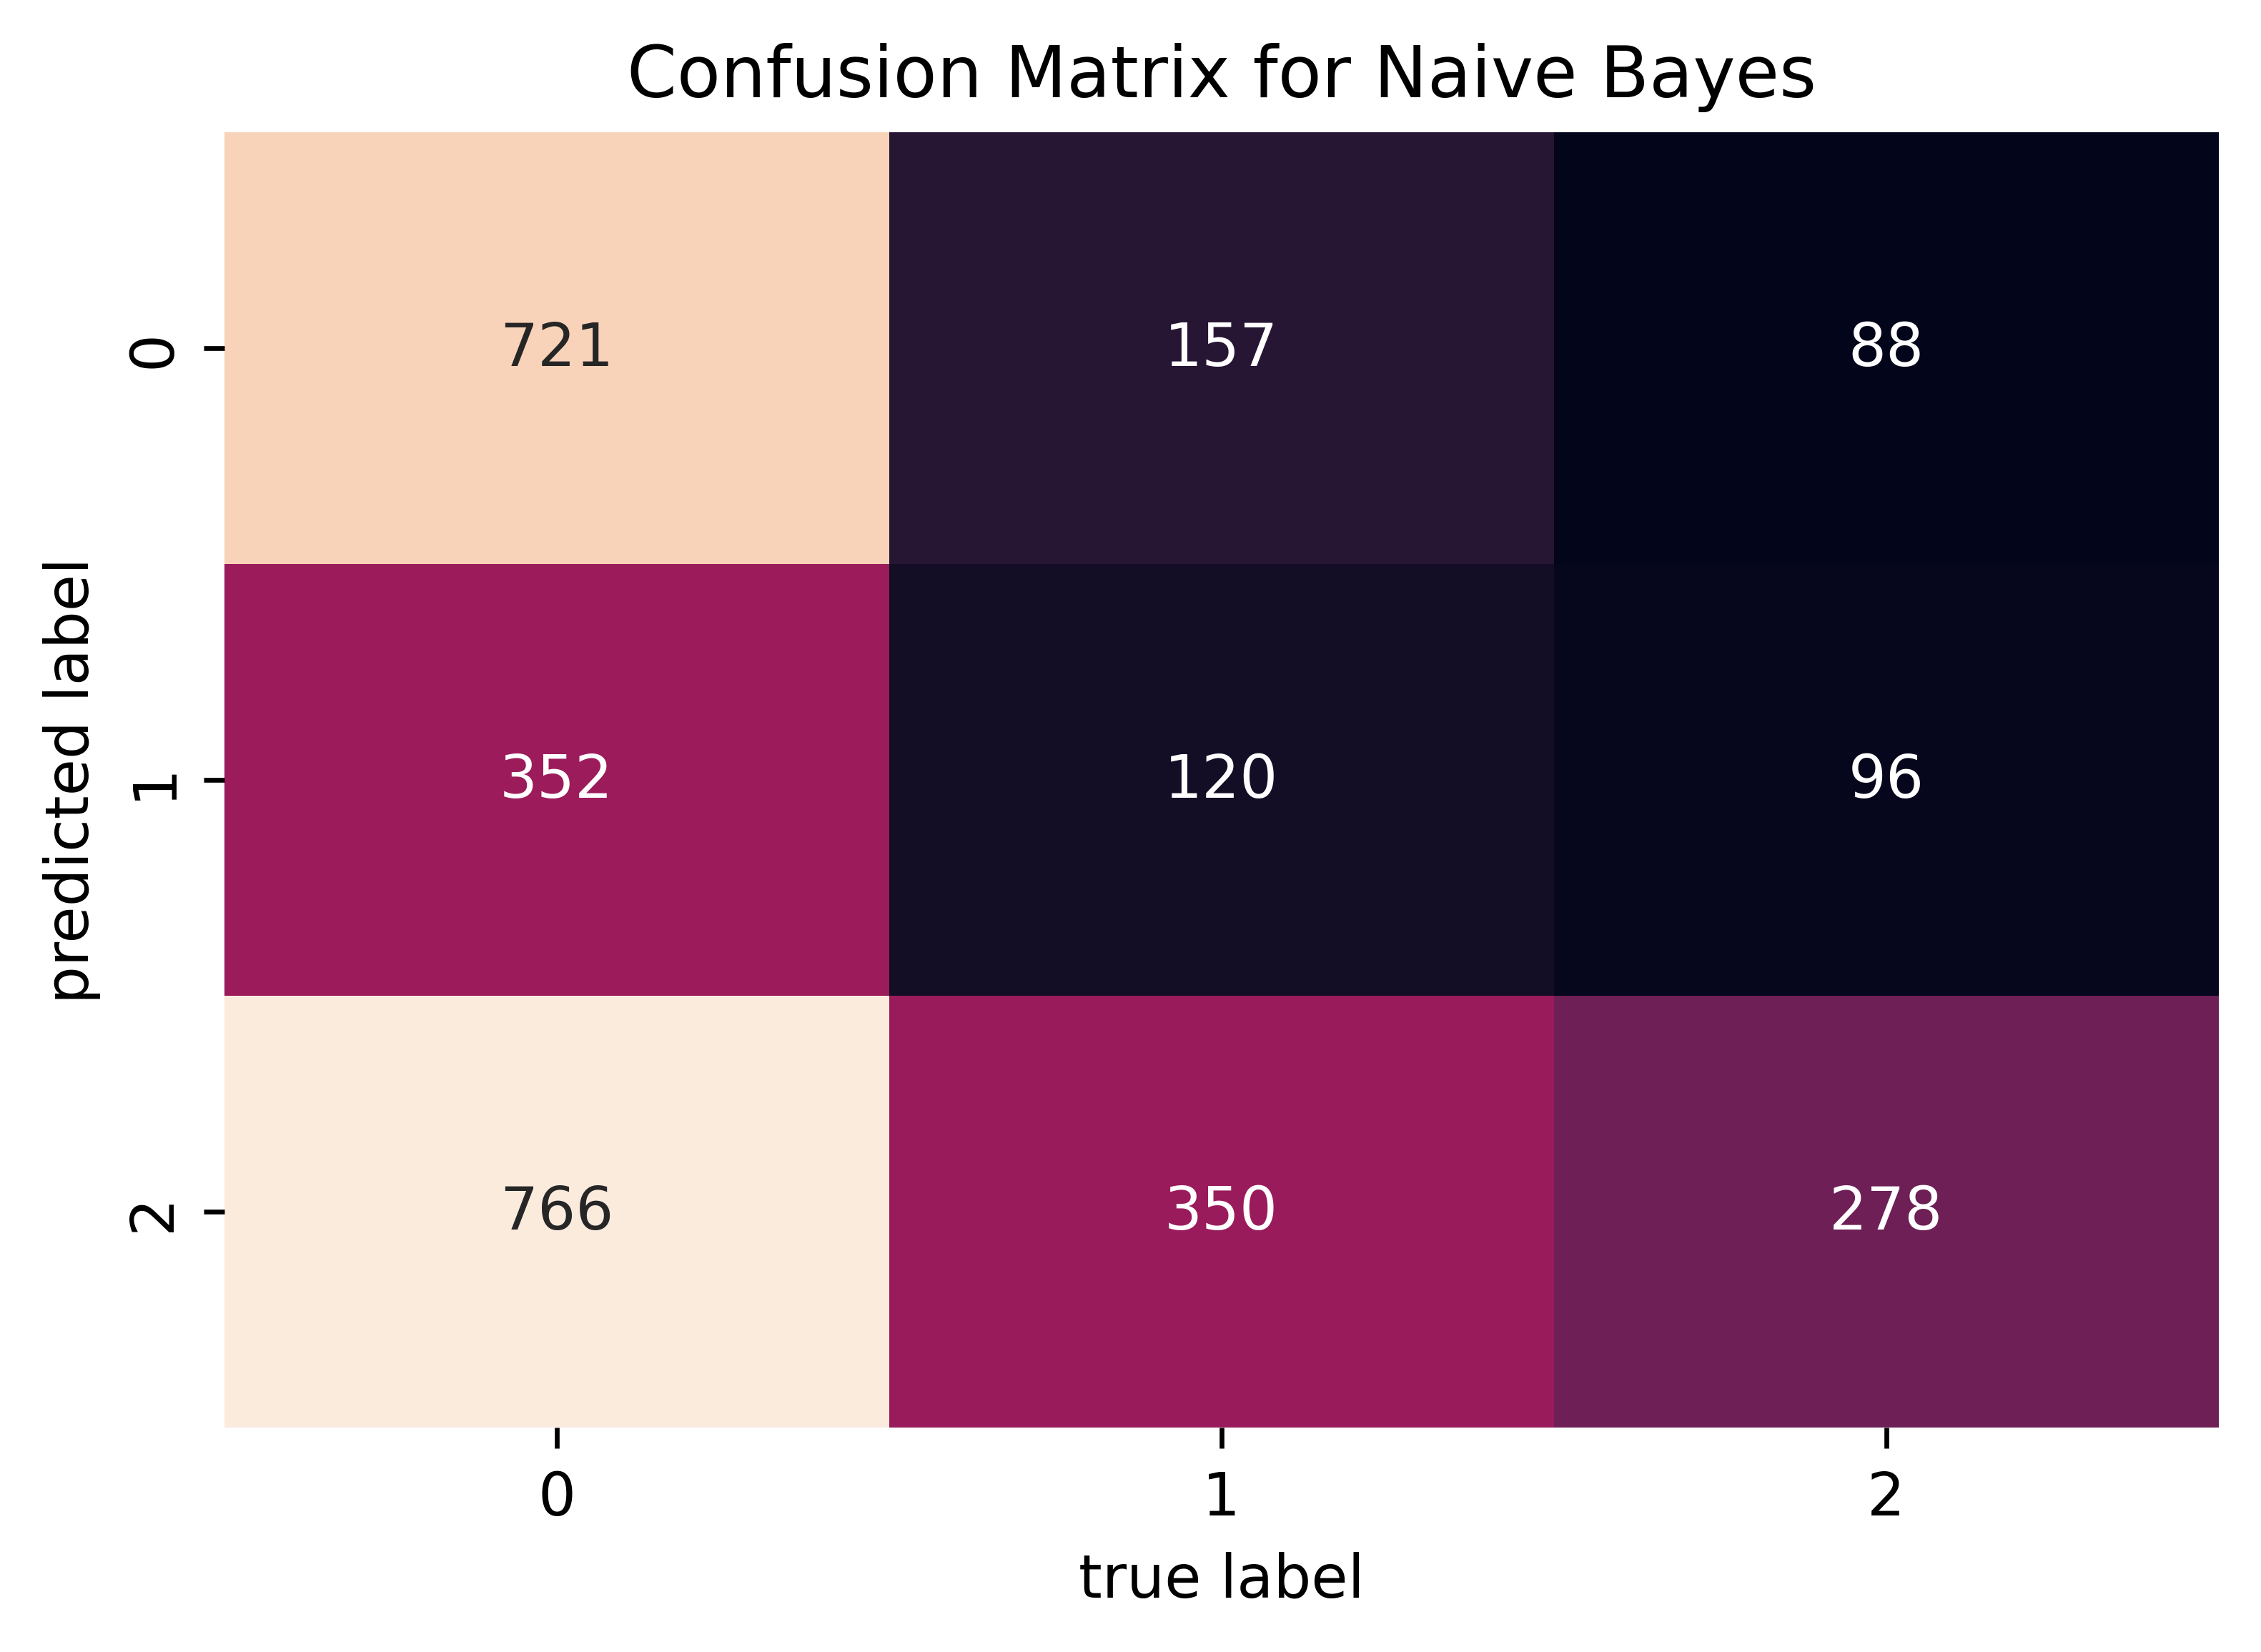

In [35]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [36]:
from sklearn.metrics import accuracy_score

score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.382172131147541


In [37]:
from sklearn.naive_bayes import GaussianNB 

model_naive = GaussianNB().fit(X_train_seq_trunc, y_train) 
predicted_naive = model_naive.predict(X_test_seq_trunc)

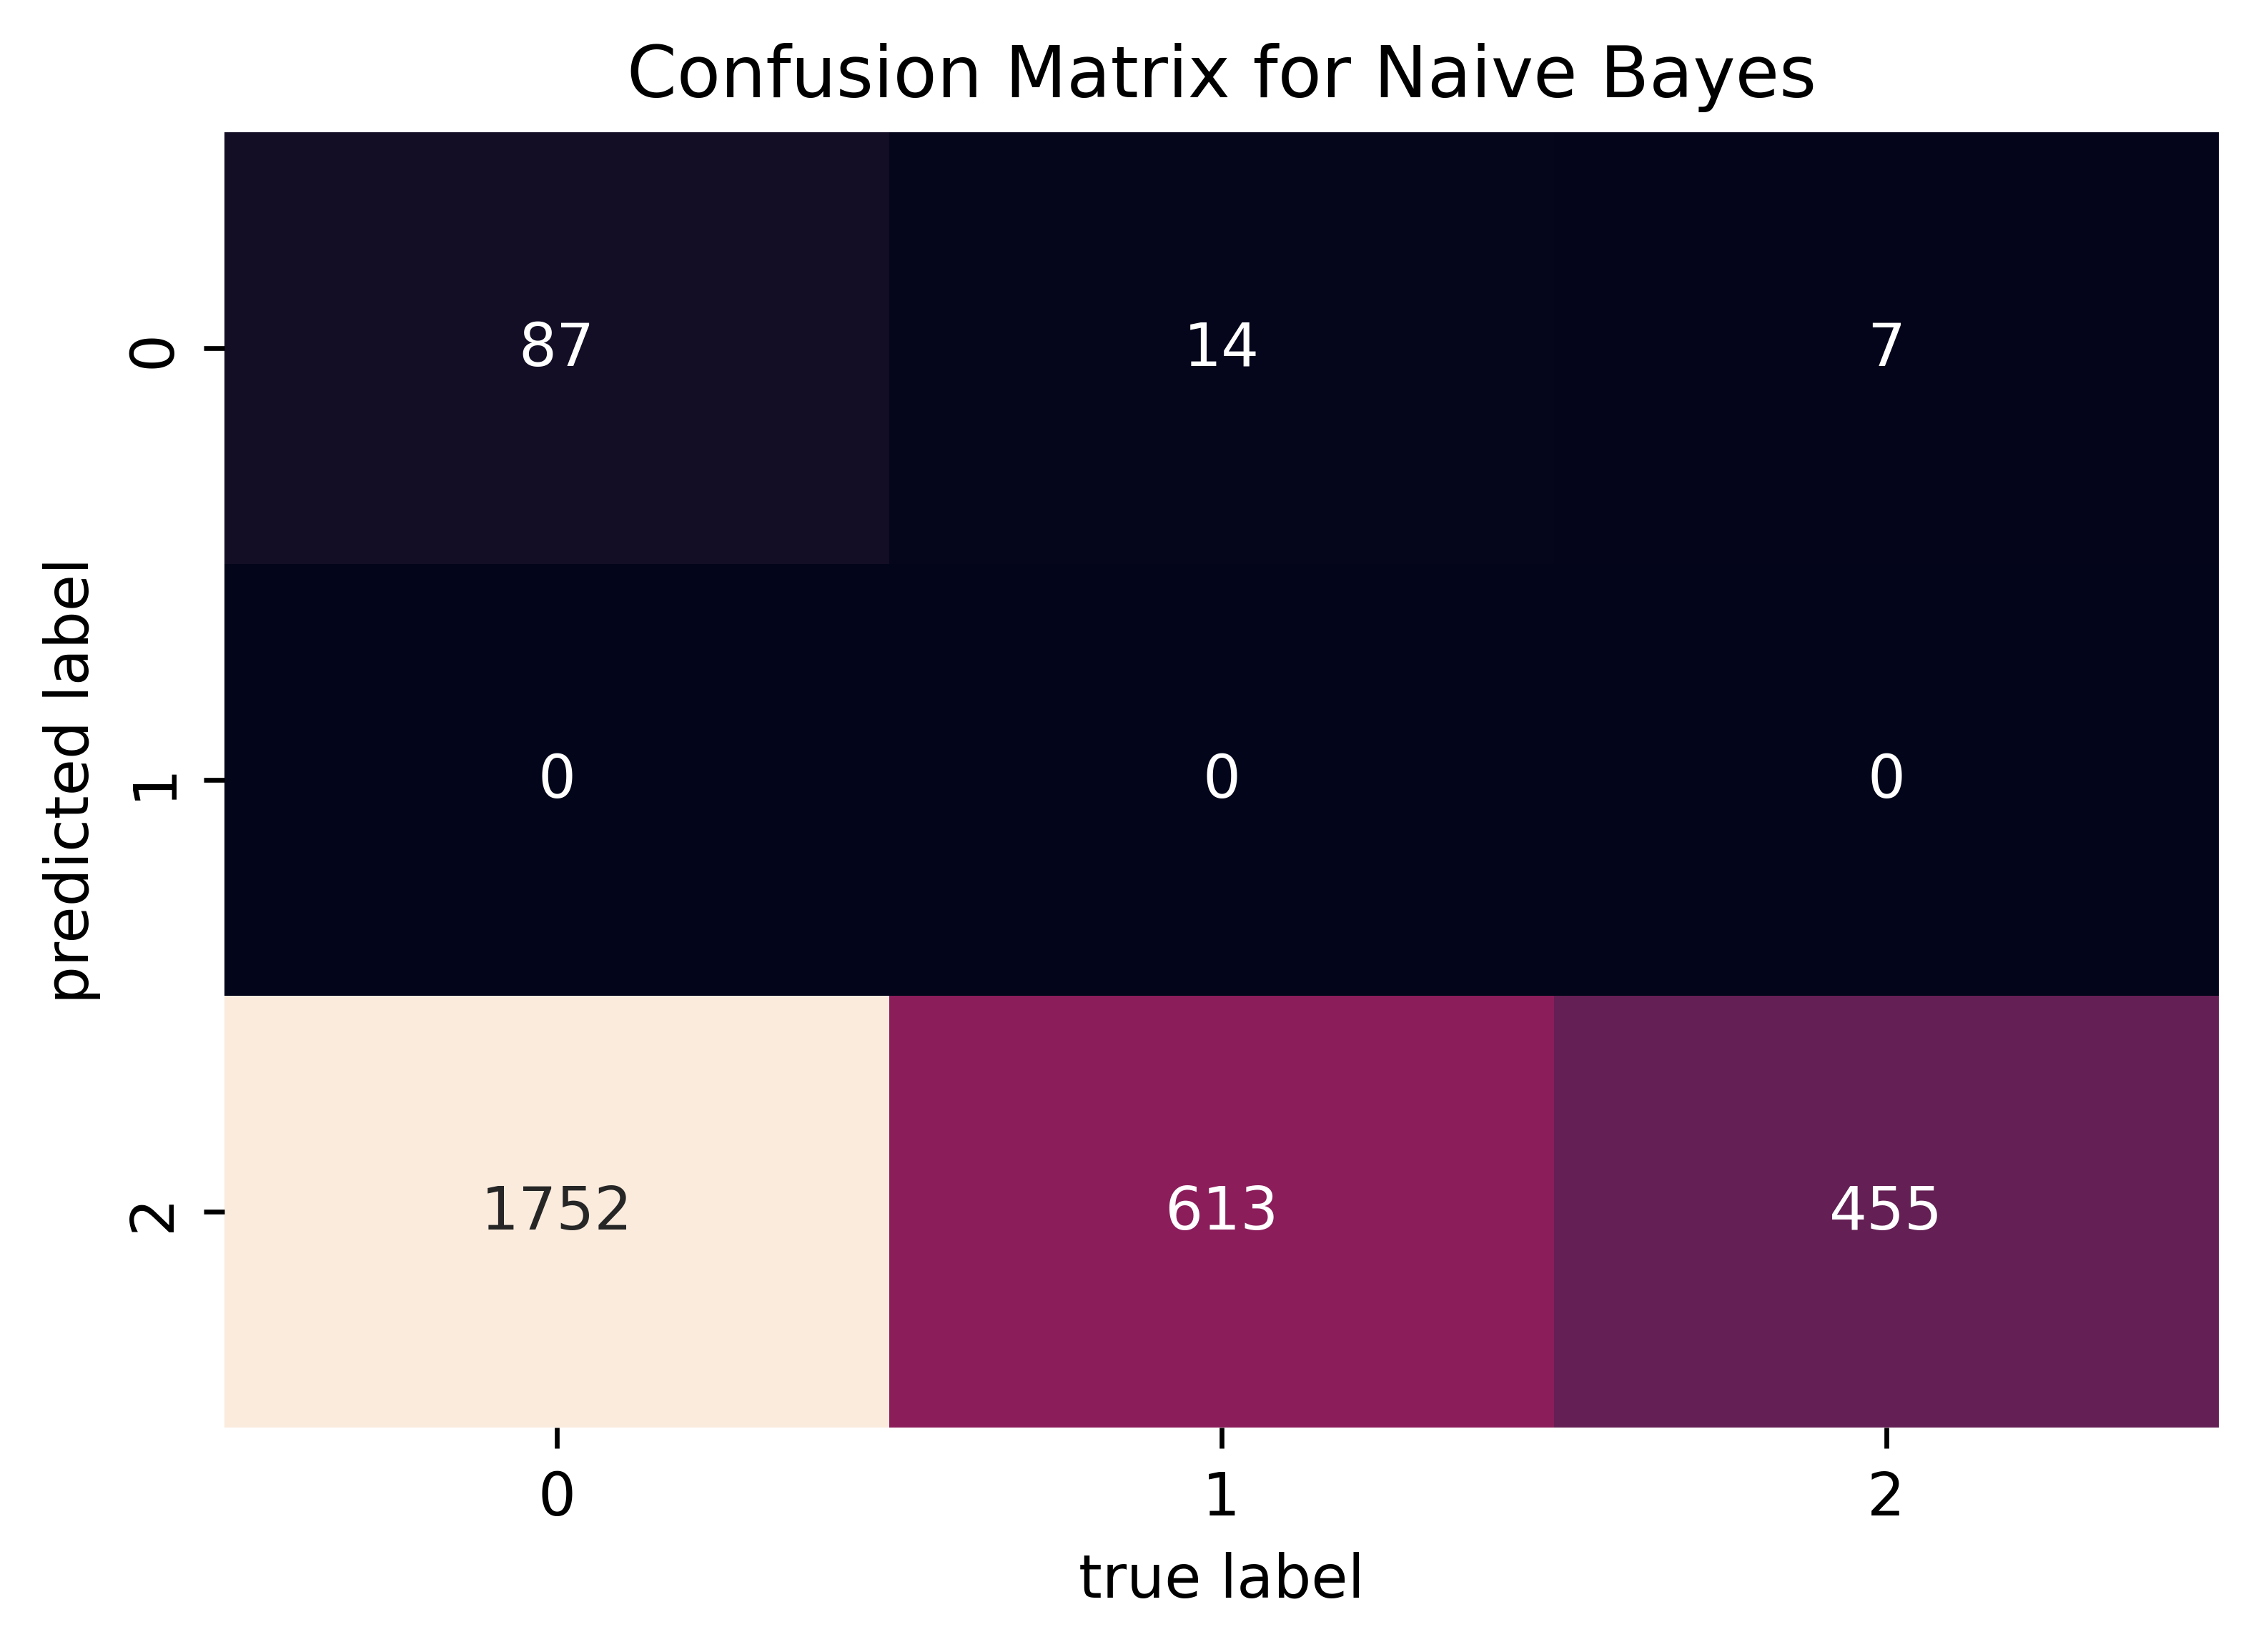

In [38]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_test, predicted_naive)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [39]:
score_naive = accuracy_score(predicted_naive, y_test)
print("Accuracy with Naive-bayes: ",score_naive)

Accuracy with Naive-bayes:  0.18510928961748635


# Sound Recogination(Male or Female) by Naive Bayes

In [40]:
import numpy as np
import pandas as pd

In [41]:
gender_data = pd.read_csv("voice.csv")
gender_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [42]:
print(gender_data.shape)

(3168, 21)


In [43]:
gender_data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [44]:
print(gender_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [45]:
gender_data['label'].unique()

array(['male', 'female'], dtype=object)

In [46]:
gender_data["label"].value_counts()

male      1584
female    1584
Name: label, dtype: int64

In [47]:
gender_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [48]:
gender_data.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [49]:
cols = gender_data.columns
features = cols[0:6]
labels = cols[6]
print(features)
print(labels)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR'], dtype='object')
skew


In [50]:
X = gender_data.iloc[:,:-1].values
y = gender_data.iloc[:,-1 ].values
X

array([[0.05978098, 0.06424127, 0.03202691, ..., 0.0078125 , 0.        ,
        0.        ],
       [0.06600874, 0.06731003, 0.04022873, ..., 0.0546875 , 0.046875  ,
        0.05263158],
       [0.0773155 , 0.08382942, 0.03671846, ..., 0.015625  , 0.0078125 ,
        0.04651163],
       ...,
       [0.14205626, 0.09579843, 0.18373124, ..., 2.9375    , 2.9296875 ,
        0.19475862],
       [0.14365874, 0.09062826, 0.18497617, ..., 3.59375   , 3.5859375 ,
        0.31100218],
       [0.16550895, 0.09288354, 0.18304392, ..., 0.5546875 , 0.546875  ,
        0.35      ]])

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_train, y_train

(array([[1.79039816e-01, 6.49623556e-02, 1.89334799e-01, ...,
         2.42187500e-01, 2.34375000e-01, 2.27272727e-01],
        [1.94606313e-01, 5.93813329e-02, 2.17306397e-01, ...,
         4.30468750e+00, 4.17187500e+00, 1.58302122e-01],
        [1.85688615e-01, 6.55894174e-02, 1.70229709e-01, ...,
         8.55468750e+00, 8.53125000e+00, 1.10024122e-01],
        ...,
        [1.78708207e-01, 5.99299235e-02, 1.91607843e-01, ...,
         5.15625000e+00, 5.13281250e+00, 9.53369310e-02],
        [1.30041559e-01, 8.48528603e-02, 1.24826590e-01, ...,
         7.81250000e-03, 0.00000000e+00, 0.00000000e+00],
        [1.79384145e-01, 6.71440548e-02, 1.71078838e-01, ...,
         5.06250000e+00, 5.03906250e+00, 1.33023256e-01]]),
 array(['female', 'male', 'male', ..., 'male', 'male', 'male'],
       dtype=object))

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
# model
clf_g = GaussianNB()

# model fitting
clf_g.fit(X_train, y_train)

results = cross_val_score(clf_g, X_train, y_train)


In [54]:
y_pred = clf_g.predict(X_valid)
#y_pred

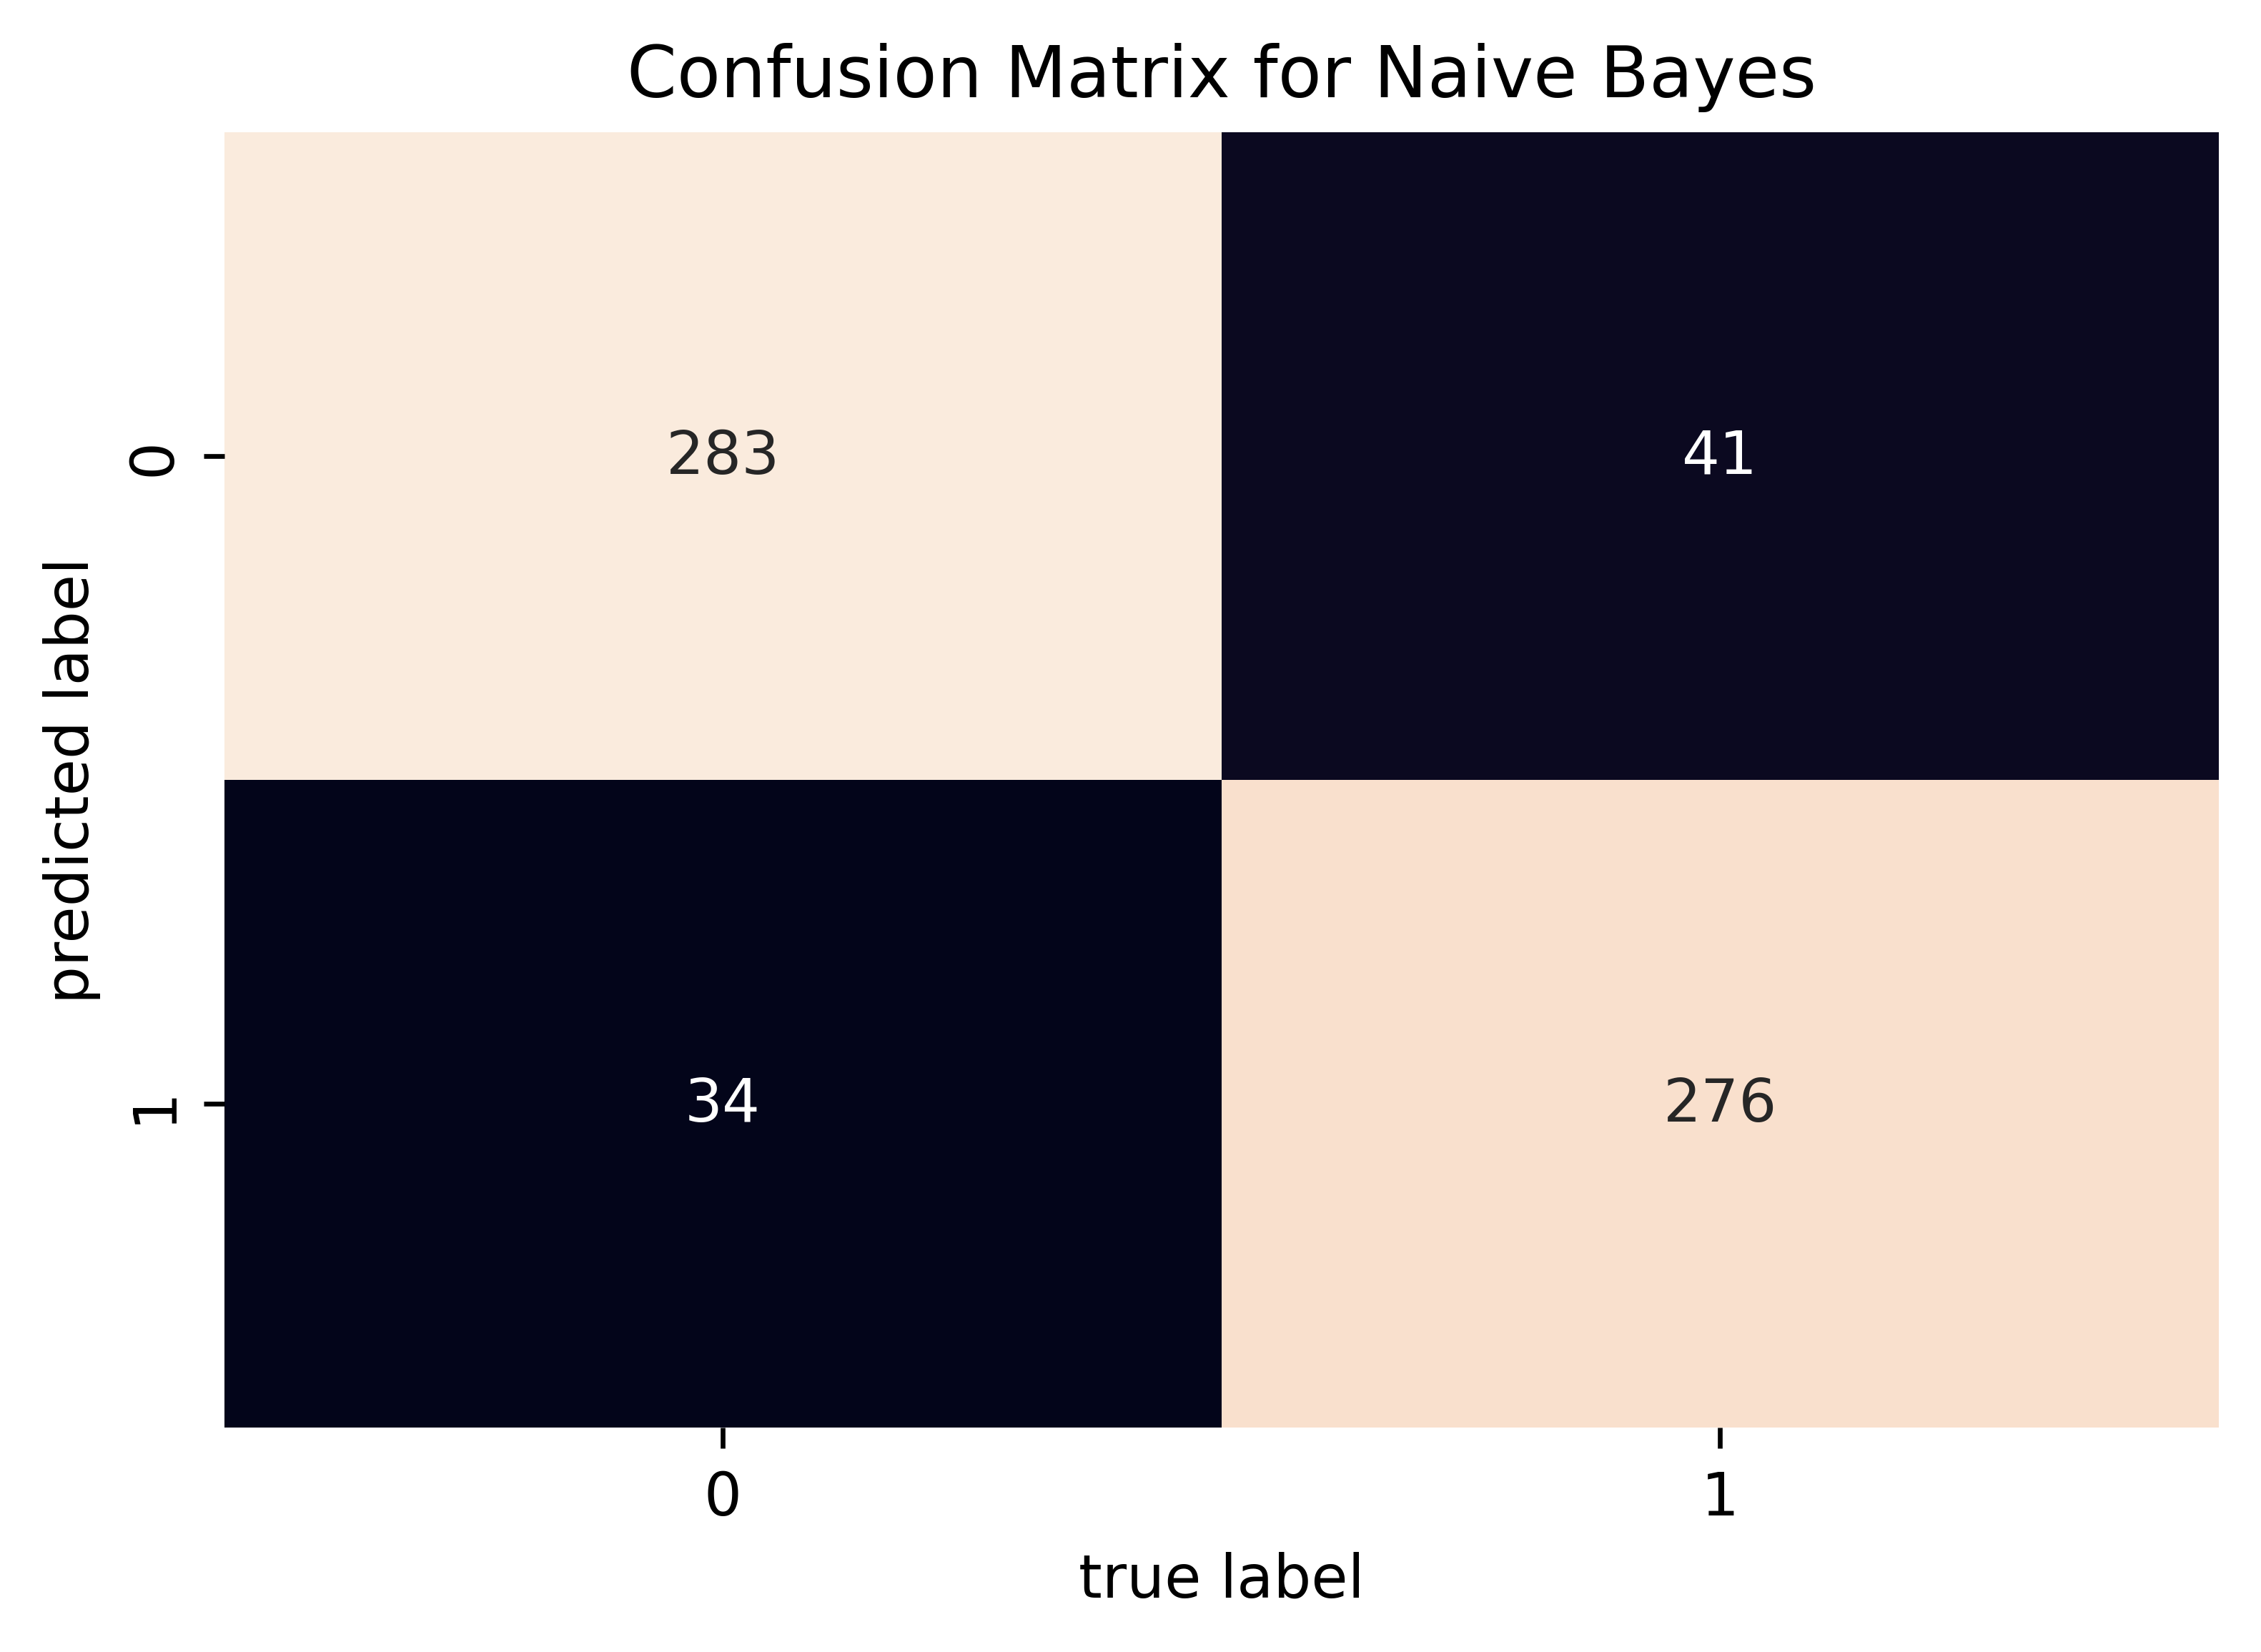

In [55]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_valid, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [56]:
def score(y_valid, y_pred):
    count=0
    for i in range(0,len(y_valid)):
        if(y_valid[i]==y_pred[i]):
            count+=1;
    return (count/len(y_valid))

In [57]:
print(score(y_valid, y_pred))

0.8817034700315457


In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
# model
clf_g = MultinomialNB()

# model fitting
clf_g.fit(X_train, y_train)

results = cross_val_score(clf_g, X_train, y_train)

In [59]:
y_pred = clf_g.predict(X_valid)

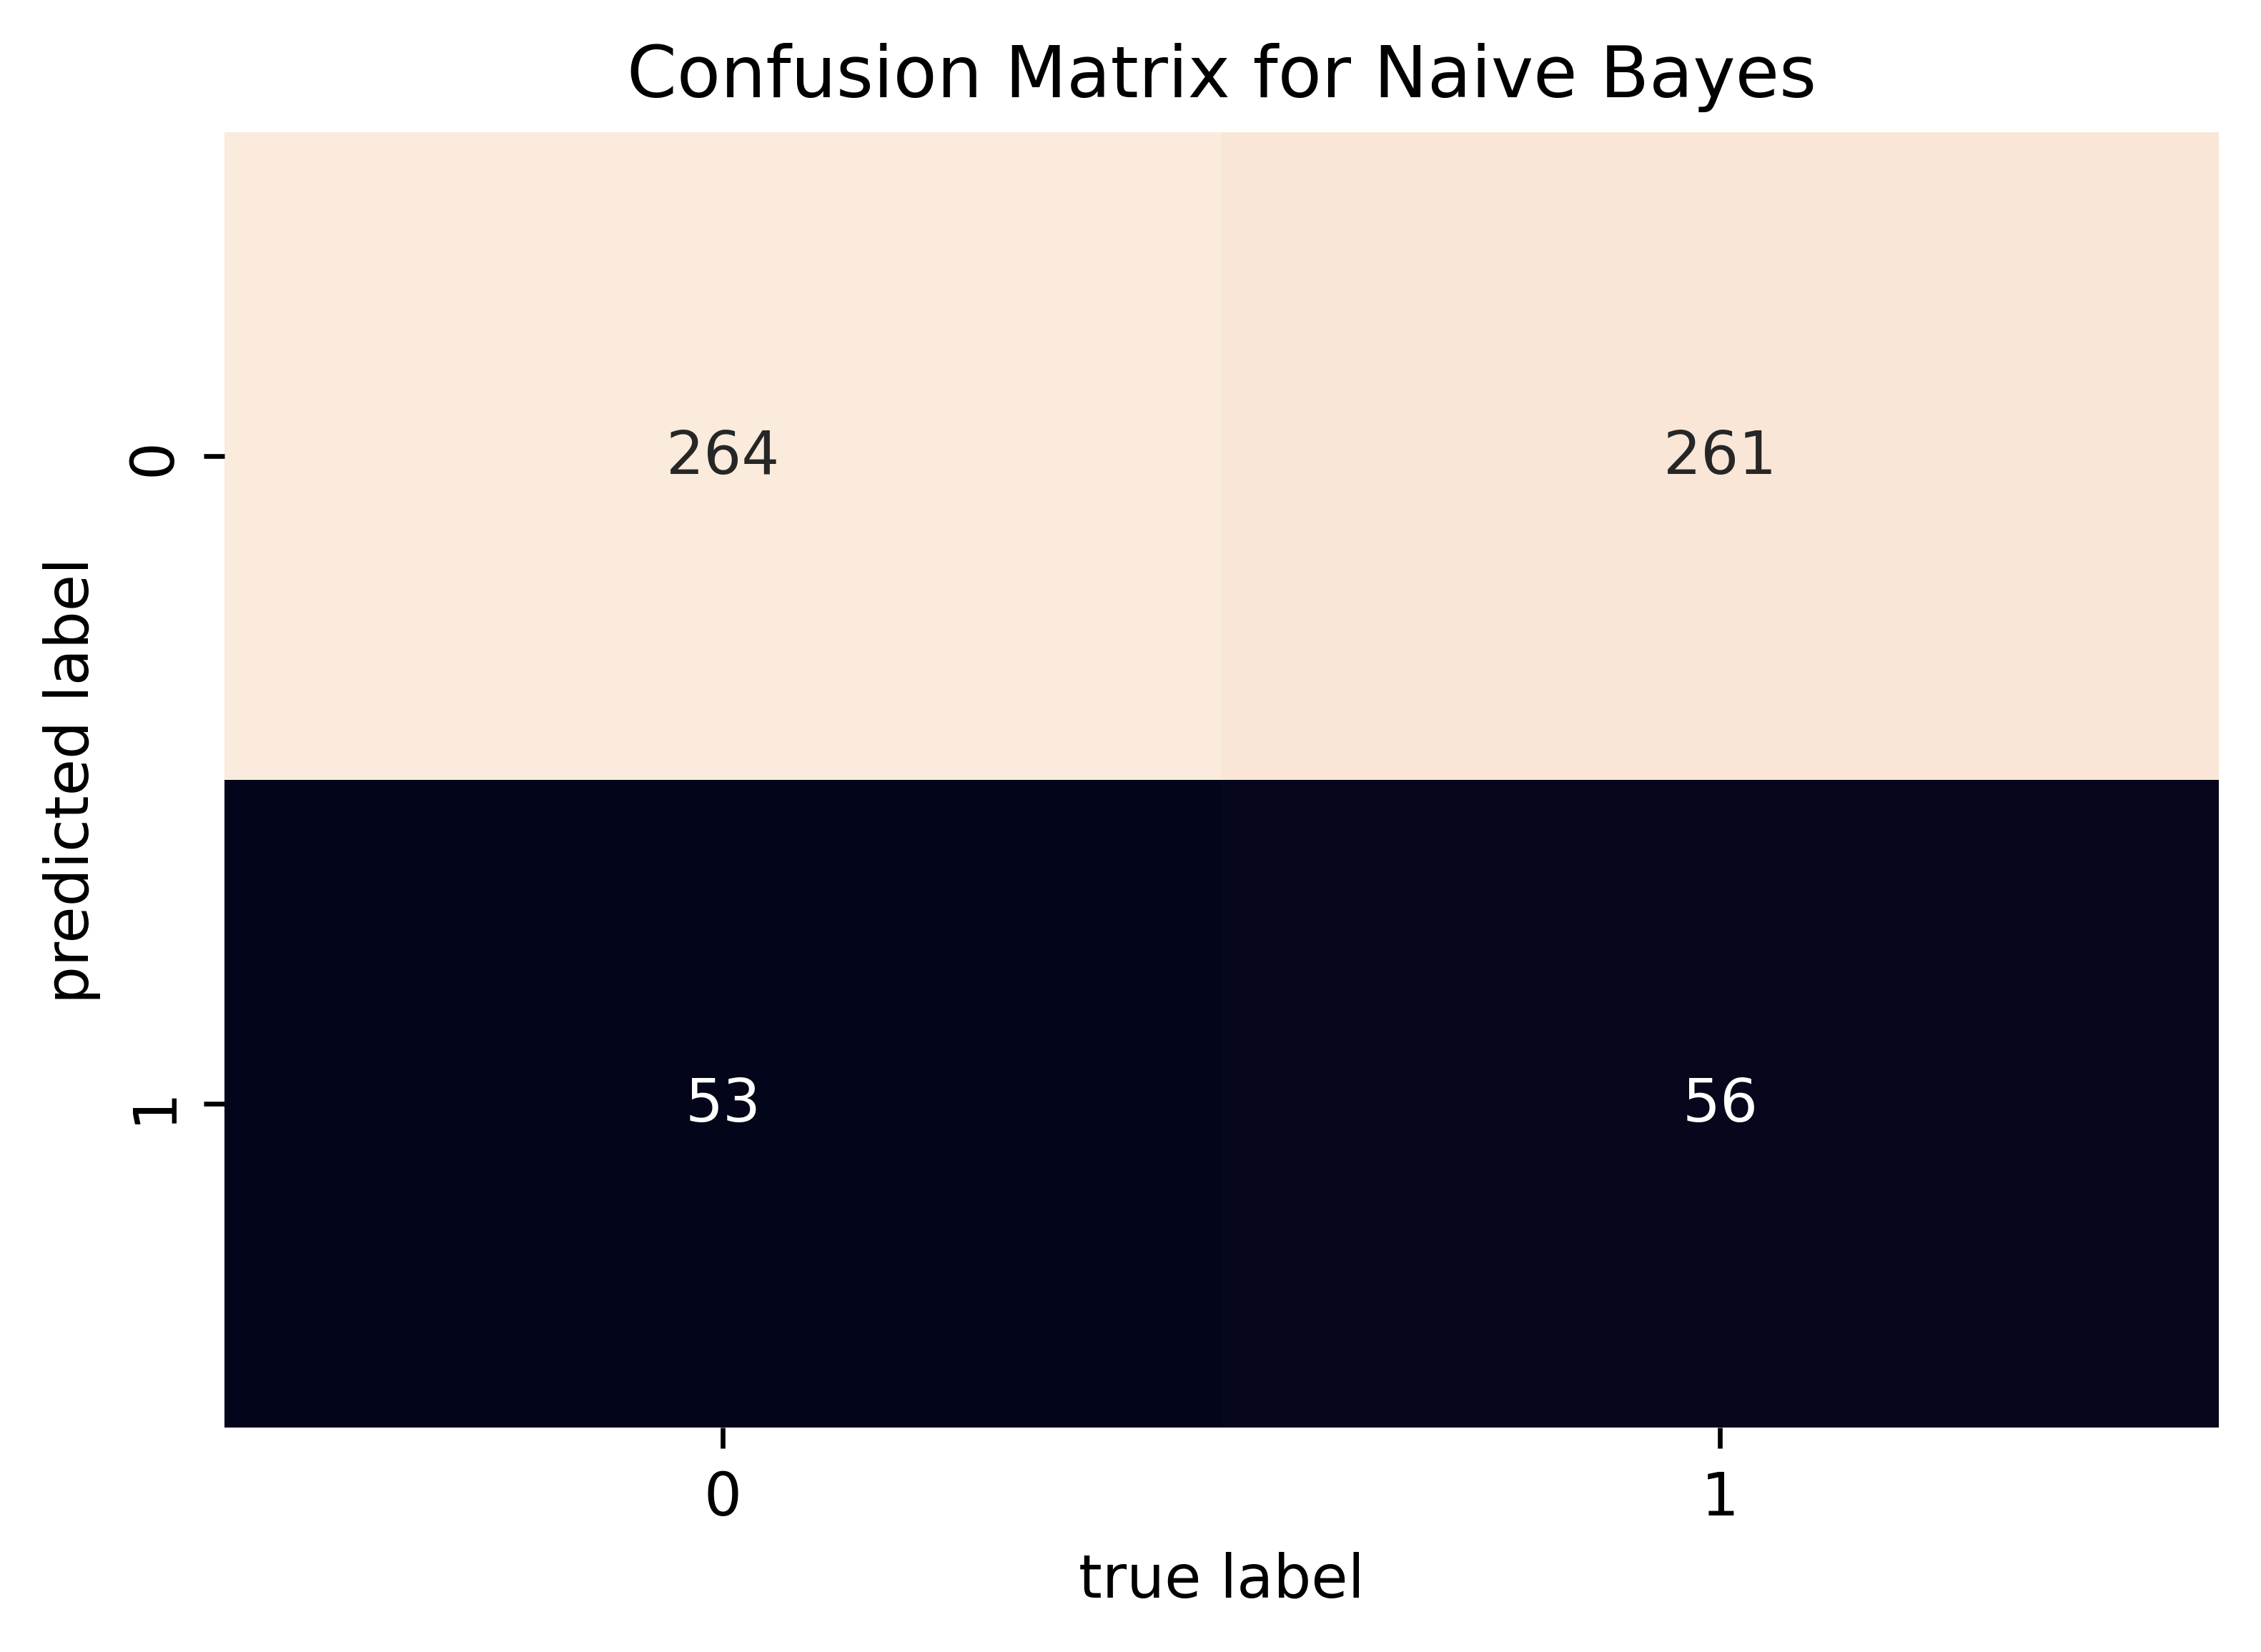

In [60]:
from sklearn.metrics import confusion_matrix

plt.figure(dpi=600)
mat = confusion_matrix(y_valid, y_pred)
sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [61]:
def score(y_valid, y_pred):
    count=0
    for i in range(0,len(y_valid)):
        if(y_valid[i]==y_pred[i]):
            count+=1;
    return (count/len(y_valid))

In [62]:
print(score(y_valid, y_pred))

0.5047318611987381


# Conclusion

From this we can conclude that for the sentiment analysis of text, LSTM performs much better than the Naive Bayes (Gaussian + Multinomial).
And we can also conclude that the for the recogination of male and female data, Naive bayes performs much better for this recogination than the sentiment data.